In [4]:
### 새로운 분류 모델을 배워보자 
### 트리분류분석부터 배워보자 
### decisiontree_randomforest.pdf 참고
'''
결정 트리 분류기 훈련
 결정 트리 학습기는 노드에서 불순도가 가장 크게 감소하는 결정 규칙을 찾습니다.
 DecisionTreeClassifier는 기본적으로 지니 불순도를 사용합니다.
 불순도를 낮추는 결정 규칙을 찾는 과정은 모든 리프 노드(leaf node)가 순수해지거나(즉, 한 클래스만 남거나) 어
떤 임곗값에 도달할 때까지 반복됩니다.
'''
from sklearn import datasets

iris = datasets.load_iris() # 데이터 로드
features = iris.data
target = iris.target

# 결정 트리 분류기 객체 생성(불순도 감소를 지표의 기본값을 지니 계수를 사용)
decisiontree = DecisionTreeClassifier(random_state=0) 
model = decisiontree.fit(features, target) # 모델 훈련

observation = [[ 5, 4, 3, 2]] # New 샘플 데이터
print(model.predict(observation)) # 샘플 데이터의 클래스 예측
print(model.predict_proba(observation)) # 세 개의 클래스에 대한 예측 확률을 확인


[1]
[[0. 1. 0.]]


In [5]:
# 불순도 감소 규칙 사용(이번에는 엔트로피)
# 엔트로피를 사용해 결정 트리 분류기를 훈련합니다.
decisiontree_entropy = DecisionTreeClassifier( criterion='entropy', random_state=0)
model_entropy = decisiontree_entropy.fit(features, target) # 모델 훈련

observation = [[ 5, 4, 3, 2]] # New 샘플 데이터
print(model.predict(observation)) # 샘플 데이터의 클래스 예측
print(model.predict_proba(observation)) # 세 개의 클래스에 대한 예측 확률을 확인


[1]
[[0. 1. 0.]]


In [9]:
'''
결정 트리 회귀 훈련(page.8)
 결정 트리 회귀는 지니 불순도나 엔트로피를 감소하는 대신 기본적으로 얼마나 평균 제곱 오차(MSE)를 감소시키
는지에 따라 분할합니다.
 사이킷런에서는 DecisionTreeRegressor를 사용하여 결정 트리 회귀를 수행할 수
있습니다
 criterion매개변수를 사용하여 분할 품질의 측정 방식을 선택할 수 있습니다.
'''
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets

boston = datasets.load_boston() # 데이터 로드
features = boston.data[:,0:2] #두 개의 특성만 선택(범죄율, 상권)
target = boston.target

decisiontree = DecisionTreeRegressor(random_state=0) # 결정 트리 회귀 모델 객체 생성
model = decisiontree.fit(features, target) # 모델 훈련

observation = [[0.02, 16]] #New 샘플 데이터
print(model) #criterion = 'mse'
print(model.predict(observation)) # 샘플 데이터의 타깃을 예측

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')
[33.]


In [8]:
# 평균 제곱 오차를 사용한 (평균 절댓값 오차MAE가 감소되는) 결정 트리 회귀 모델 객체 생성
decisiontree_mae = DecisionTreeRegressor(criterion="mae", random_state=0)
model_mae = decisiontree_mae.fit(features, target) # 모델 훈련
print(model_mae) #criterion = 'mae'
print(model_mae.predict(observation))

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')
[33.]


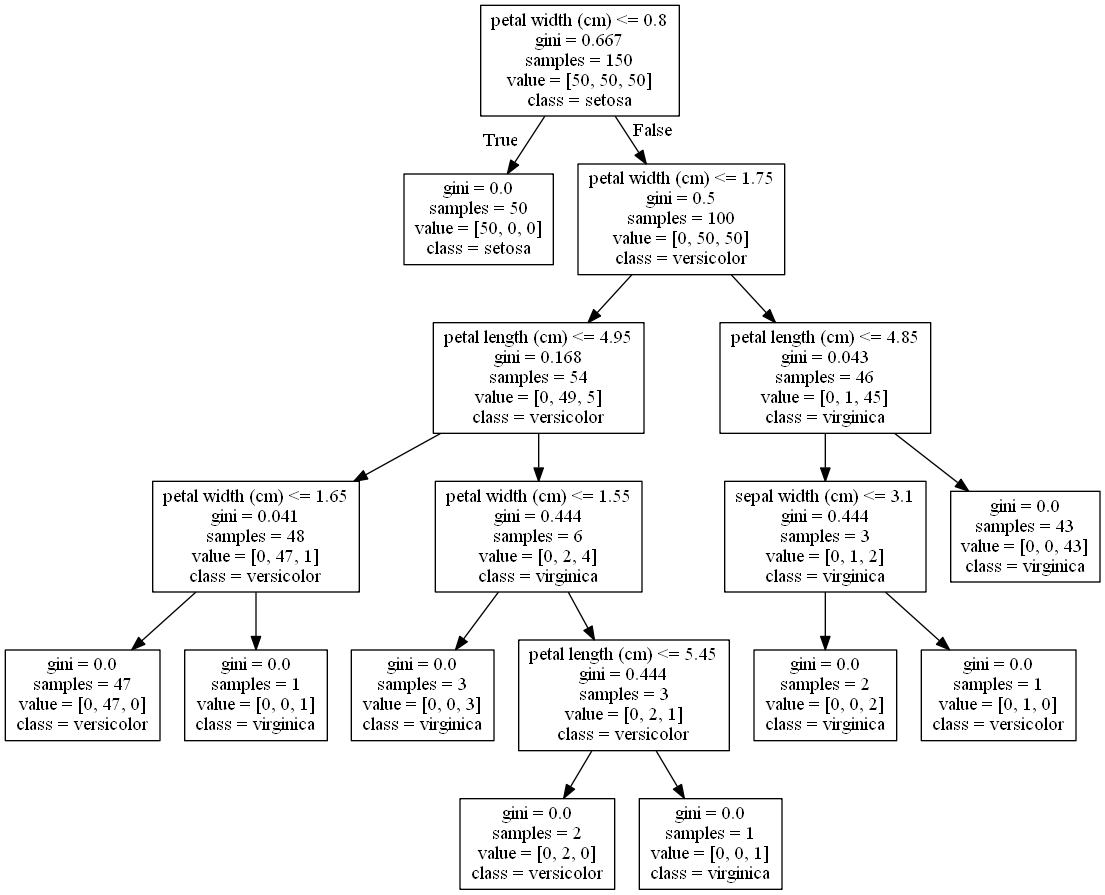

In [1]:
'''
결정 트리 모델 시각화
 결정 트리 분류기의 장점은 훈련된 전체 모델을 시각화할 수 있다는 것이다.
 훈련된 모델을 DOT 포맷으로 변환한 다음 그래프를 그립니다.
'''
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image
from sklearn import tree

iris = datasets.load_iris() # 데이터 로드
features = iris.data
target = iris.target

decisiontree = DecisionTreeClassifier(random_state=0) # 결정 트리 분류기를 만듭니다.
model = decisiontree.fit(features, target) # 모델 훈련

# DOT 데이터를 만듭니다
dot_data = tree.export_graphviz(decisiontree,
                                out_file=None,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names) 

graph = pydotplus.graph_from_dot_data(dot_data) # 그래프를 그립니다.
Image(graph.create_png()) # 그래프 출력
# graph.write_pdf("iris.pdf") # PDF를 만듭니다.
# graph.write_png("iris.png") # PNG 파일을 만듭니다

In [2]:
#confusion_matrix(정답, 예측)
from sklearn.metrics import confusion_matrix

confusion_matrix(target, decisiontree.predict(features))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

In [4]:
##############타이타닉 데이터 생존자 분류 분석 (decision tree) ###########
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler

df = sns.load_dataset("titanic")
df.head()
feature_names = ["pclass", "age", "sex"]
dfX = df[feature_names ].copy()
dfy = df["survived"].copy()
print(dfX.tail())

from sklearn.preprocessing import LabelEncoder
dfX["sex"] = LabelEncoder().fit_transform(dfX["sex"])
print(dfX.tail())

dfX["age"].fillna(dfX["age"].mean(), inplace=True)
print(dfX.tail())

from sklearn.preprocessing import LabelBinarizer
dfX2 = pd.DataFrame(LabelBinarizer().fit_transform(dfX["pclass"]), columns=['c1', 'c2', 'c3'], index=dfX.index)
dfX = pd.concat([dfX, dfX2], axis=1)
del(dfX['pclass'])
print(dfX.tail())


     pclass   age     sex
886       2  27.0    male
887       1  19.0  female
888       3   NaN  female
889       1  26.0    male
890       3  32.0    male
     pclass   age  sex
886       2  27.0    1
887       1  19.0    0
888       3   NaN    0
889       1  26.0    1
890       3  32.0    1
     pclass        age  sex
886       2  27.000000    1
887       1  19.000000    0
888       3  29.699118    0
889       1  26.000000    1
890       3  32.000000    1
           age  sex  c1  c2  c3
886  27.000000    1   0   1   0
887  19.000000    0   1   0   0
888  29.699118    0   0   0   1
889  26.000000    1   1   0   0
890  32.000000    1   0   0   1


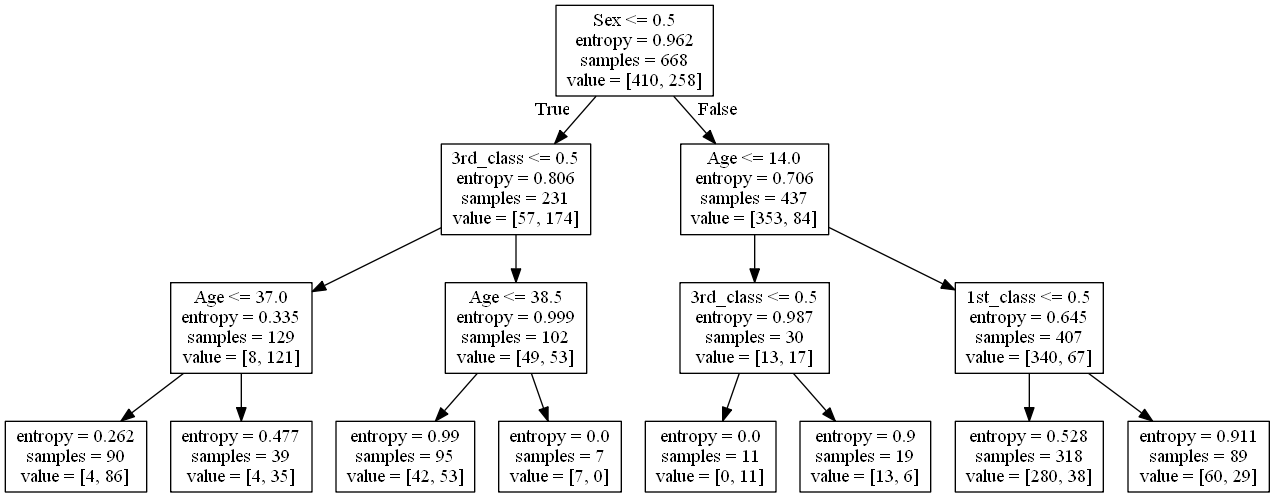

In [13]:
#test, train data 분리 (0.25)
#decisiontree 분류 분석
#시각화
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import io
import pydot 
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image
from sklearn import tree 

X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.25, random_state=0)

#분류분석 
model = DecisionTreeClassifier(criterion='entropy', 
                               max_depth=3, 
                               min_samples_leaf=5).fit(X_train, y_train)

#시각화
command_buf = io.StringIO() #문자열 입출력 관하여 선언 (메모리 처리속도상)
tree.export_graphviz(model, out_file=command_buf, feature_names=[
                'Age', 'Sex', '1st_class', '2nd_class', '3rd_class'])
#graph = pydot.graph_from_dot_data(command_buf.getvalue())[0]
graph = pydotplus.graph_from_dot_data(command_buf.getvalue())
image = graph.create_png()
Image(image)

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix(y_train, model.predict(X_train))

confusion_matrix(y_test, model.predict(X_test))

print(classification_report(y_train, model.predict(X_train)))

print(classification_report(y_test, model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.83      0.88      0.85       410
           1       0.79      0.72      0.75       258

    accuracy                           0.82       668
   macro avg       0.81      0.80      0.80       668
weighted avg       0.81      0.82      0.81       668

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       139
           1       0.75      0.70      0.72        84

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223

